Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.color import rgb2hsv

Hue color palette finder for RESIZE IMAGE (does use cv2.resize from cv2 function)

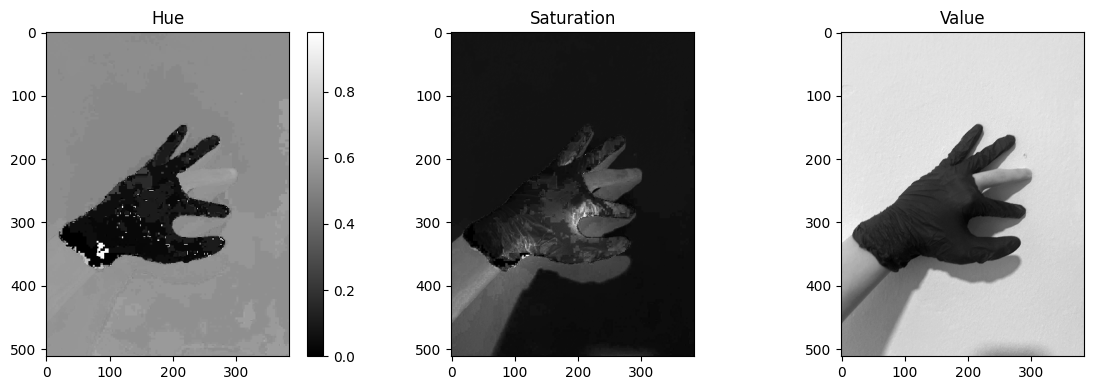

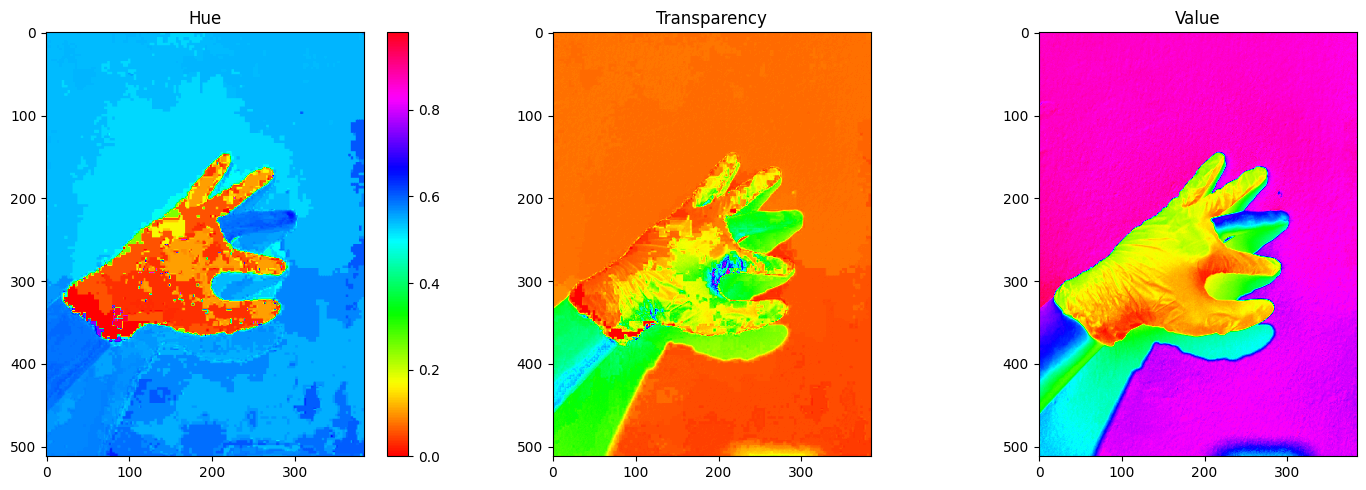

In [16]:
def visualize_hsv_channels(image):
    # hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    channel_titles = ['Hue', 'Saturation', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='gray')
        ax[i].set_title(title)
        
    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='gray'))
    fig.tight_layout()
    
    plt.show()

def visualize_hsv_colormap(image):
    # hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hsv_image = rgb2hsv(image)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    channel_titles = ['Hue', 'Transparency', 'Value']
    for i, title in enumerate(channel_titles):
        ax[i].imshow(hsv_image[..., i], cmap='hsv')
        ax[i].set_title(title)

    fig.colorbar(ax[0].imshow(hsv_image[..., 0], cmap='hsv'))
    fig.tight_layout()

    plt.show()

# Load the image and visualize the HSV channels
image = cv.imread("D:\\OneDrive - Asia Pacific University\\Degree Year 3\\Image Processing, Computer Vision and Pattern Recognition\\Assignment\\Source Code\\Glove-Defect-Detection-System\\Images\\Nitrile\\missing_finger_7.jpg")
new_img = cv.resize(image, None, fx=0.2, fy=0.2)
visualize_hsv_channels(new_img)
visualize_hsv_colormap(new_img)

Method to test whether, stain are segmented properly (RESIZED IMAGE ONLY)

In [3]:
import cv2
import numpy as np

def apply_mask(lower_hue, upper_hue, saturation_threshold):
    image = cv2.imread("C:\\Users\\JJ\\OneDrive\\Desktop\\Glove-Defect-Detection-System\\Images\\Latex\\missing_finger.jpg")
    new_img = cv2.resize(image, None, fx=0.2, fy=0.2)
    hsv_image = cv2.cvtColor(new_img, cv2.COLOR_BGR2HSV)

    lower_mask = hsv_image[..., 0] > lower_hue
    upper_mask = hsv_image[..., 0] < upper_hue
    saturation_mask = hsv_image[..., 1] > saturation_threshold

    mask = np.logical_and.reduce((lower_mask, upper_mask, saturation_mask))
    masked_image = new_img * np.expand_dims(mask, axis=2)

    cv2.imshow("Masked Image", masked_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

apply_mask(85, 105, 90)